# My Notebook

[INFO] Processing: 179.png


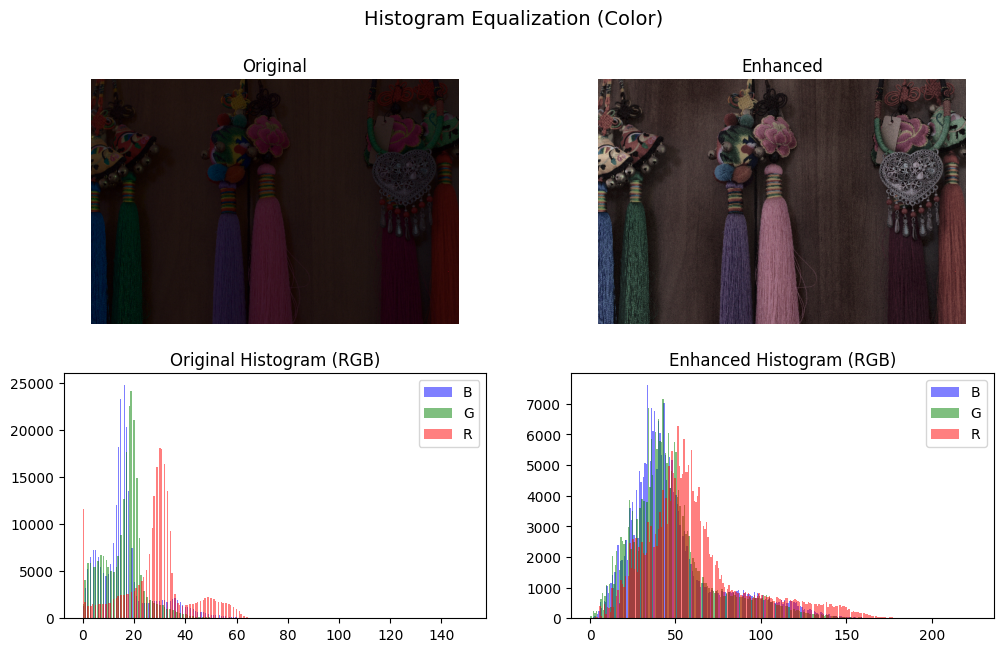

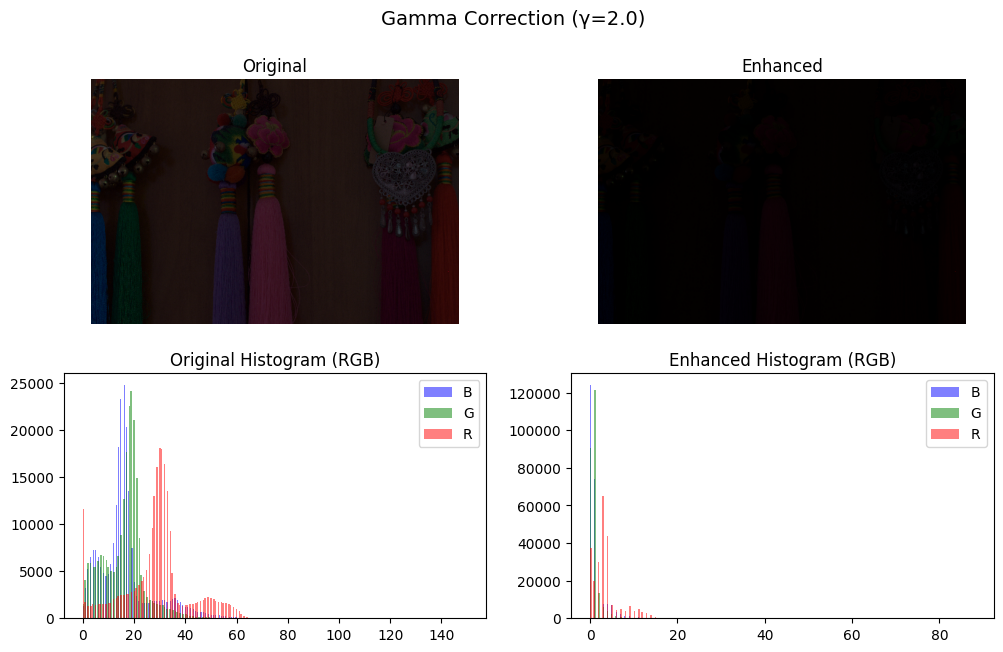

[INFO] Processing: 2.png


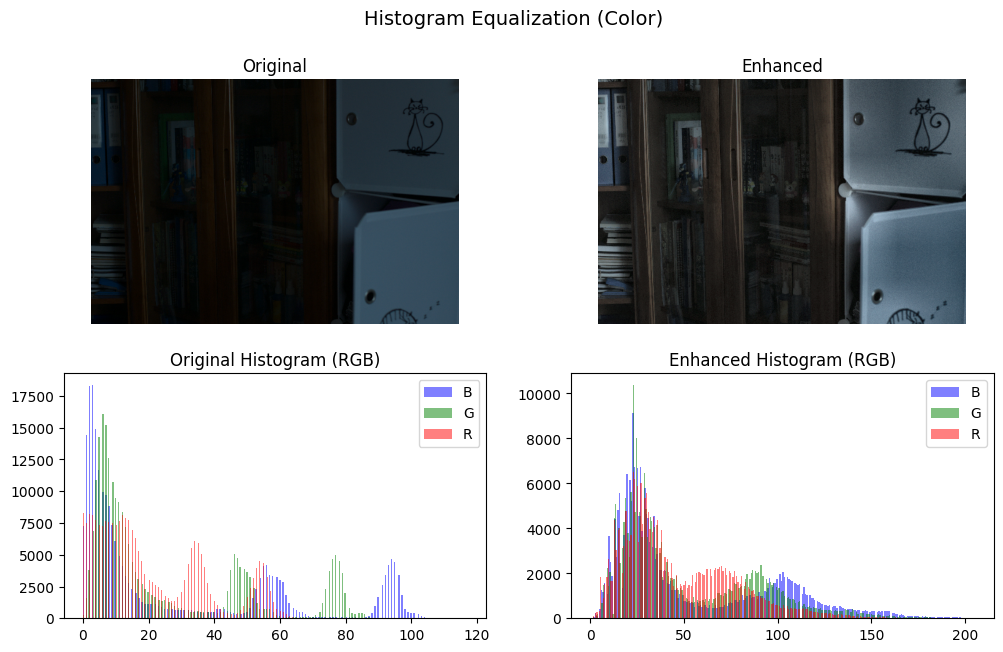

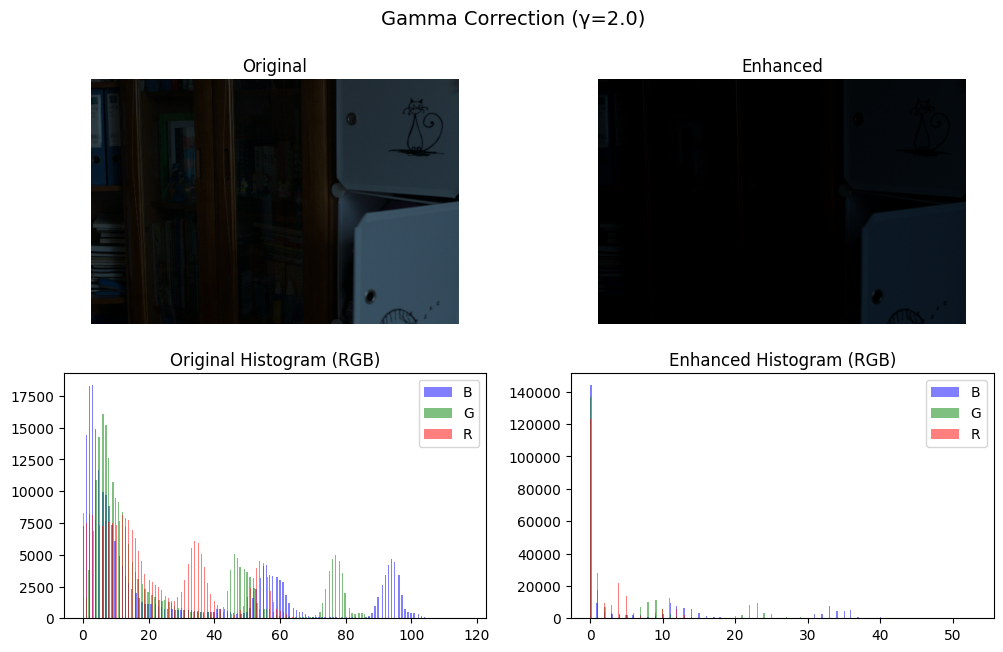

[INFO] Processing: 22.png


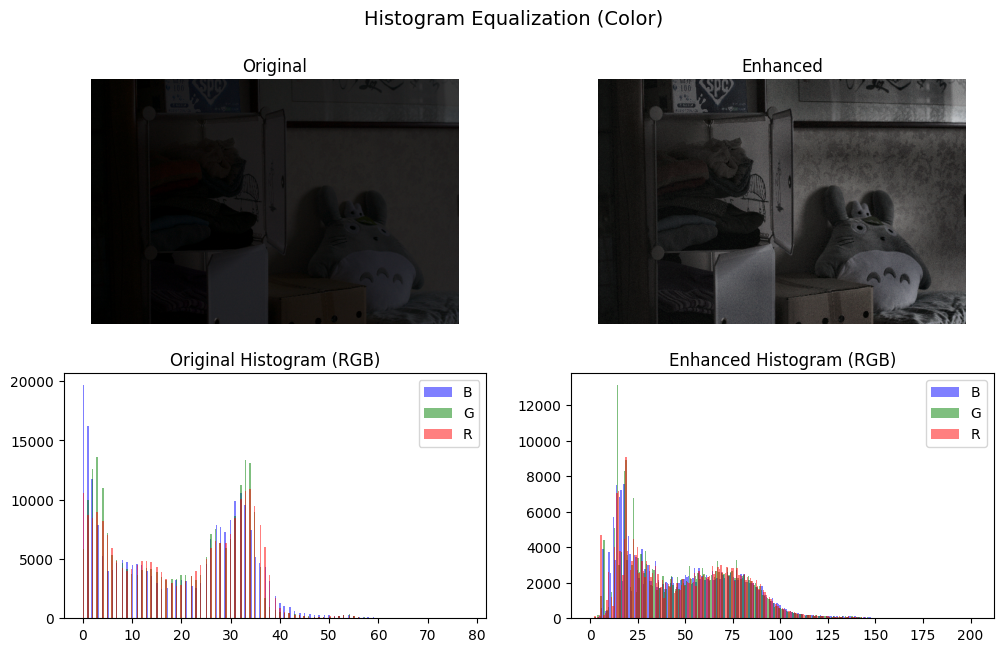

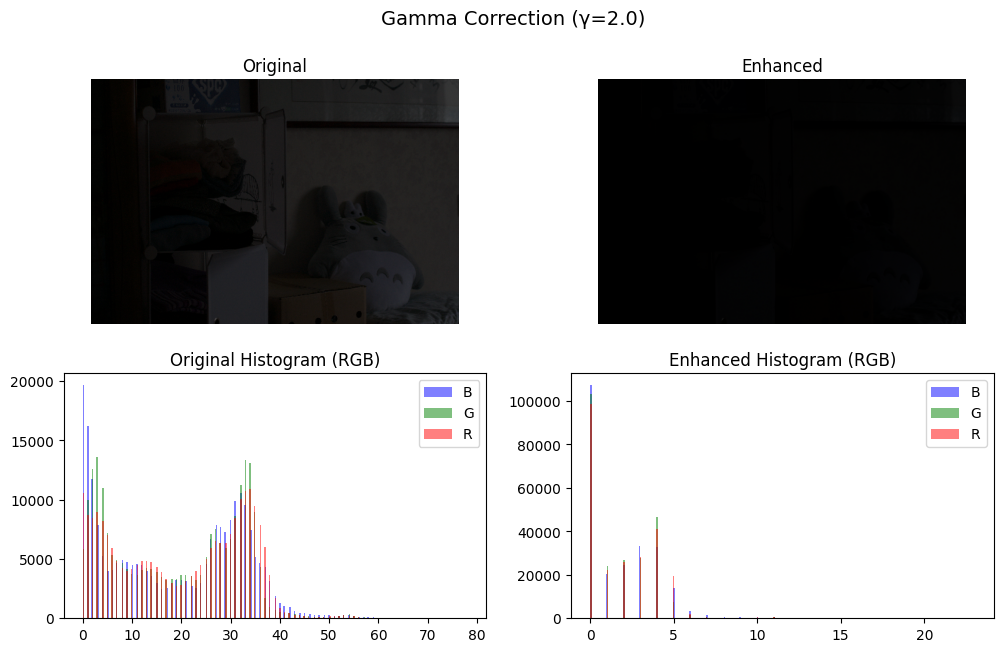

[INFO] Processing: 35.png


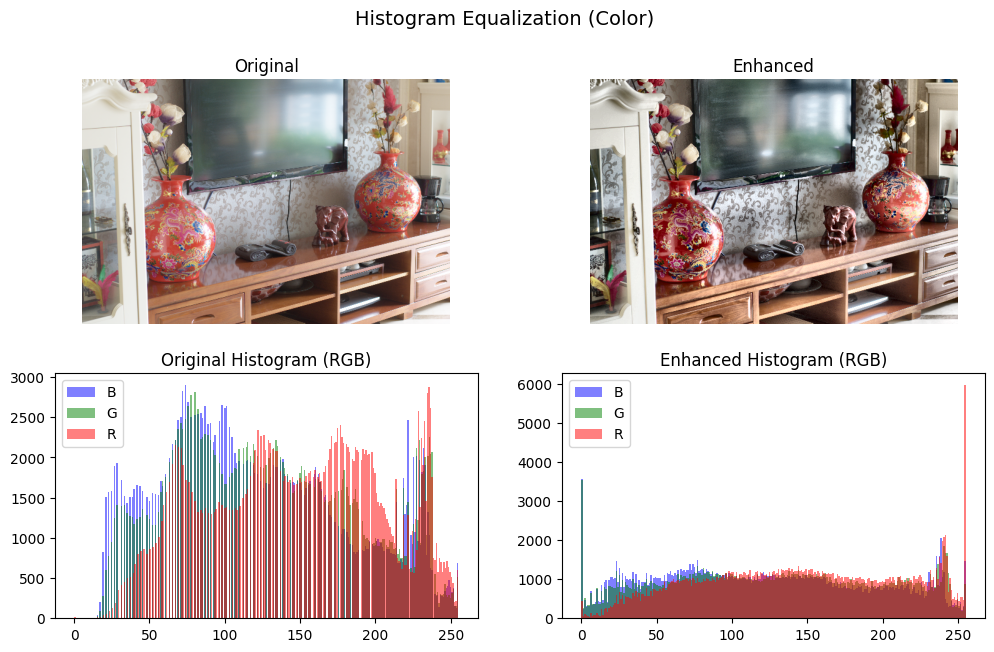

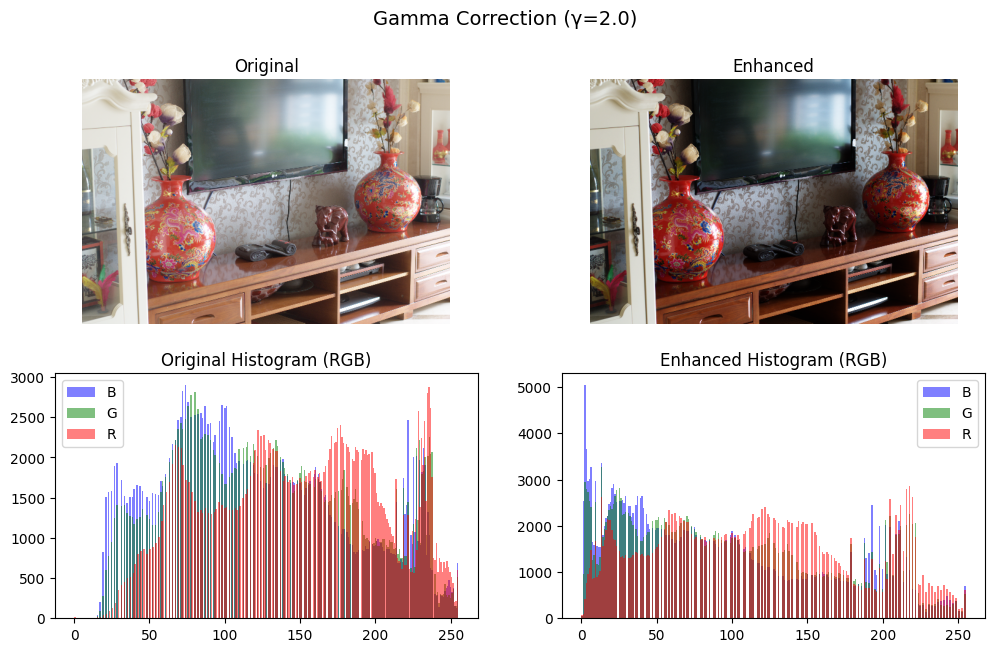

[INFO] Processing: 40.png


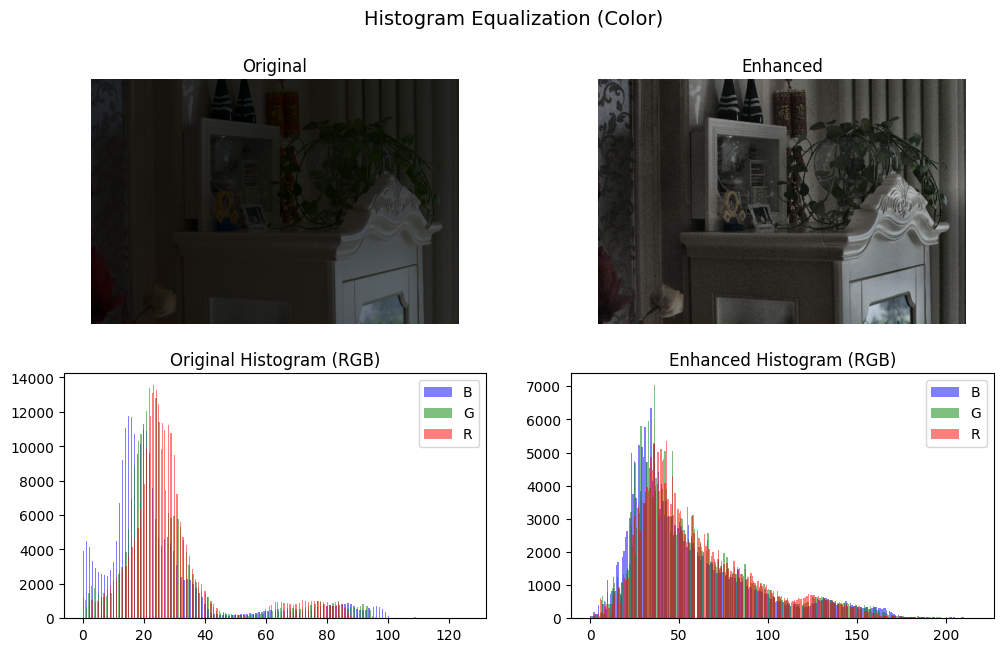

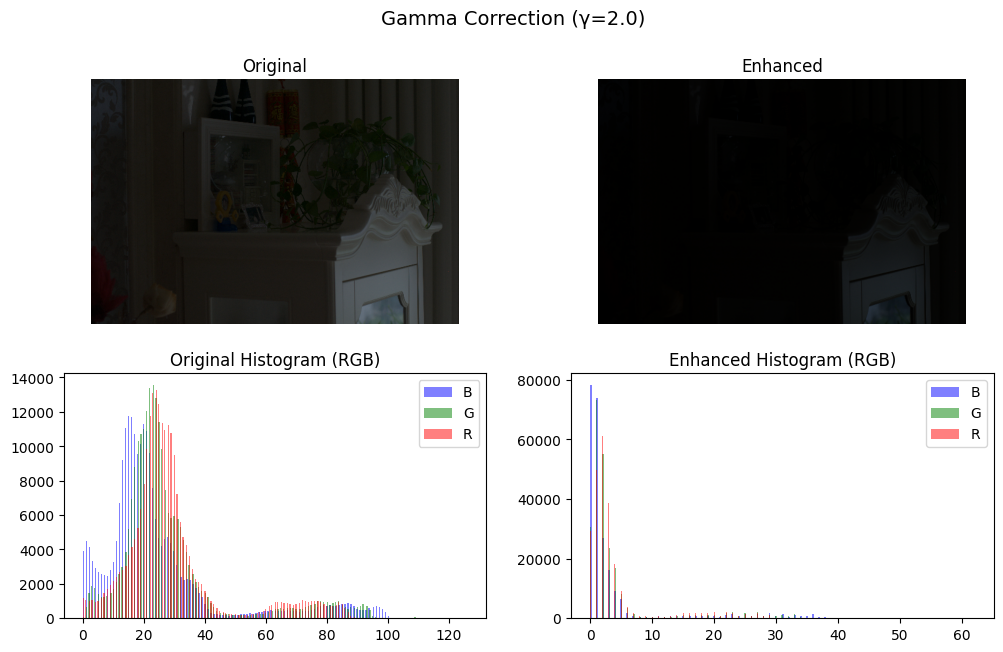

[INFO] Processing: 47.png


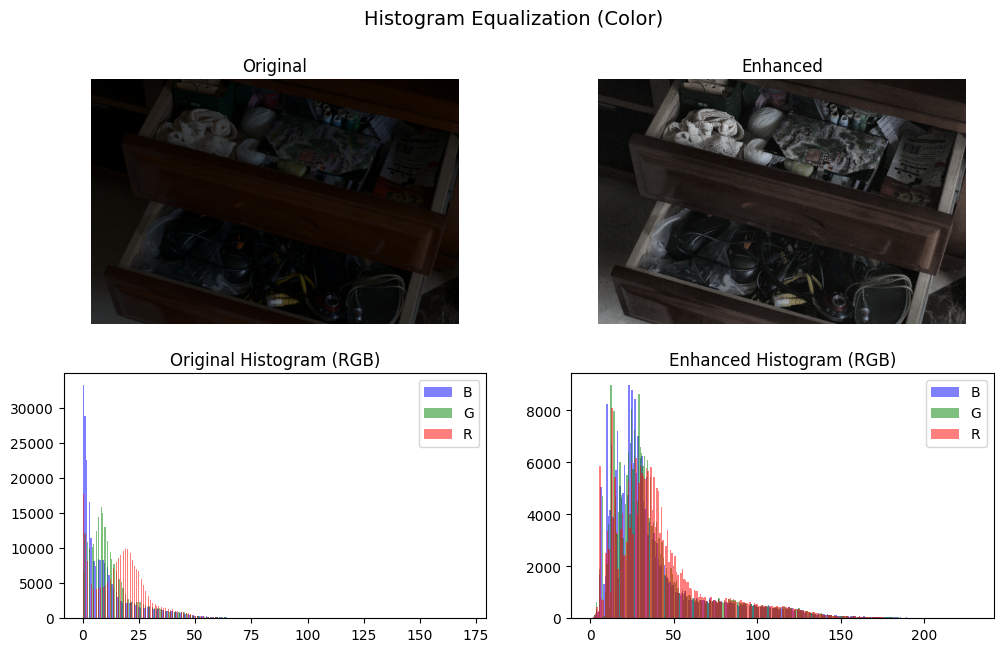

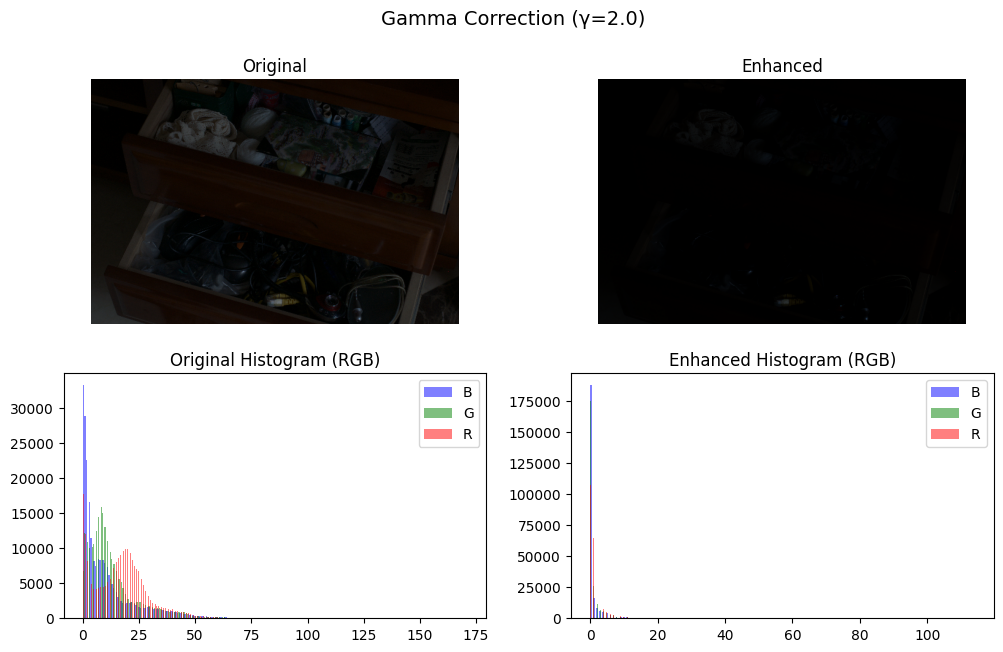

[INFO] Processing: 493.png


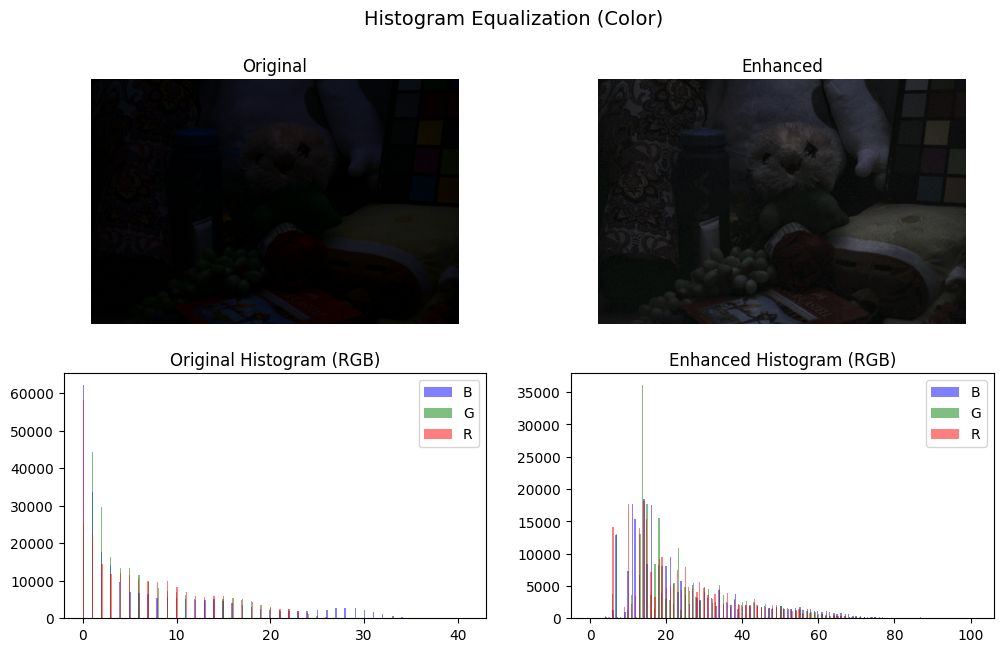

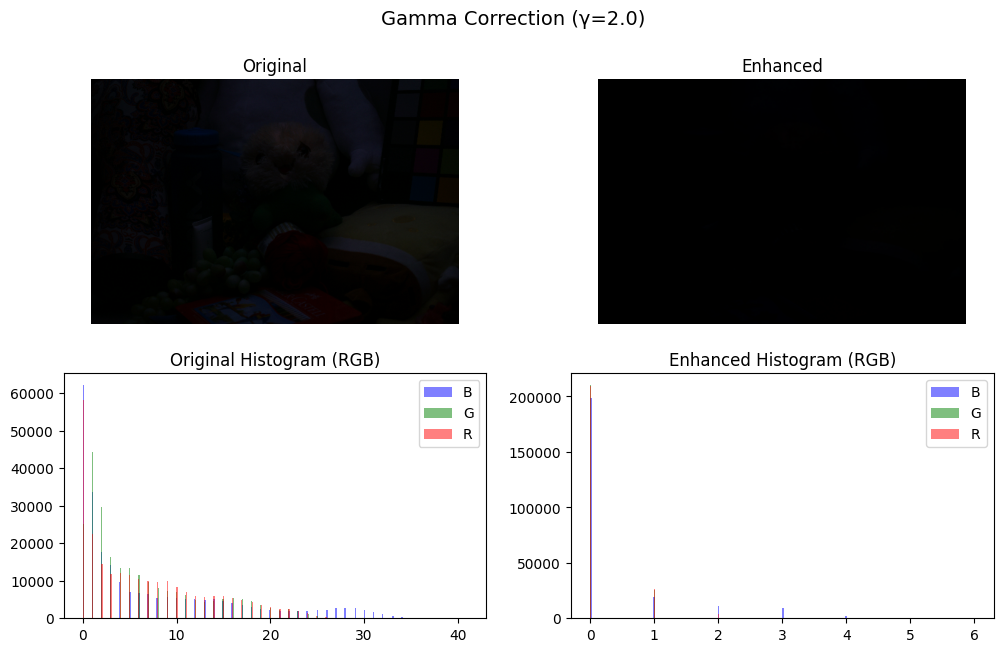

[INFO] Processing: 5.png


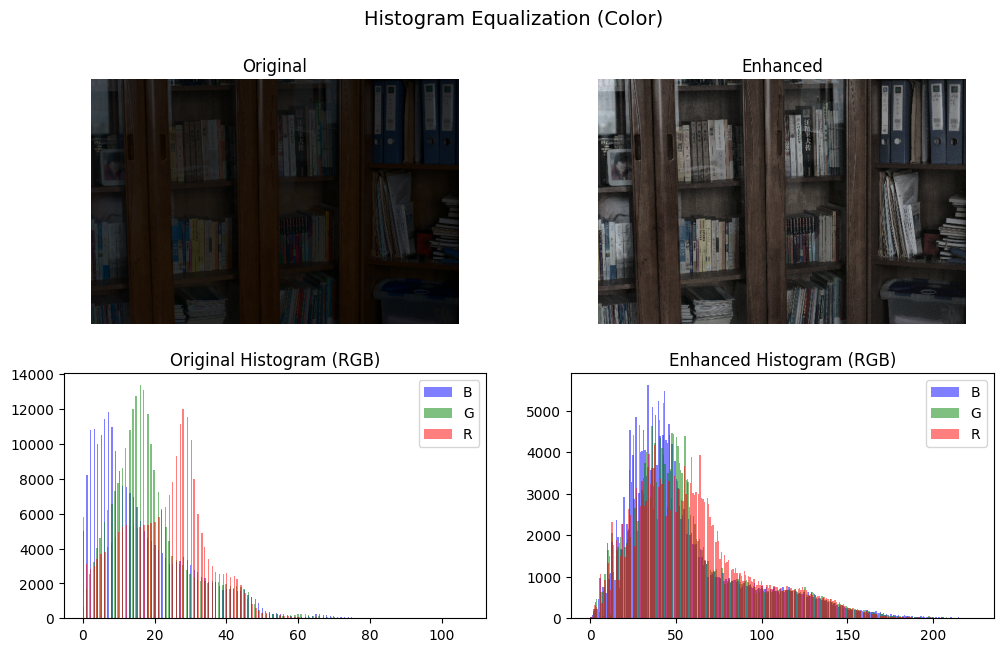

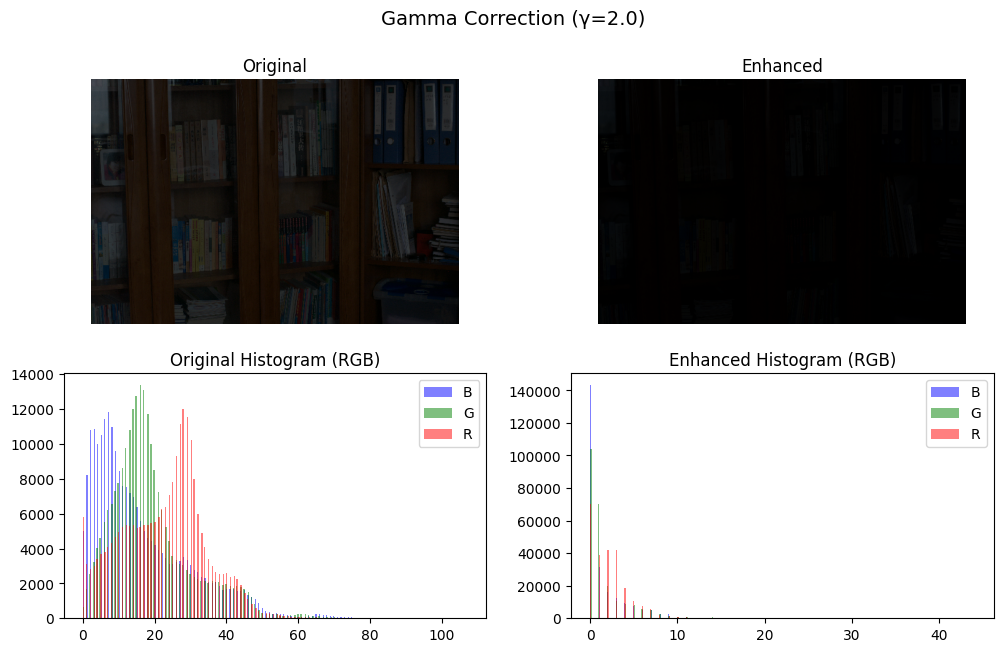

[INFO] Processing: 51.png


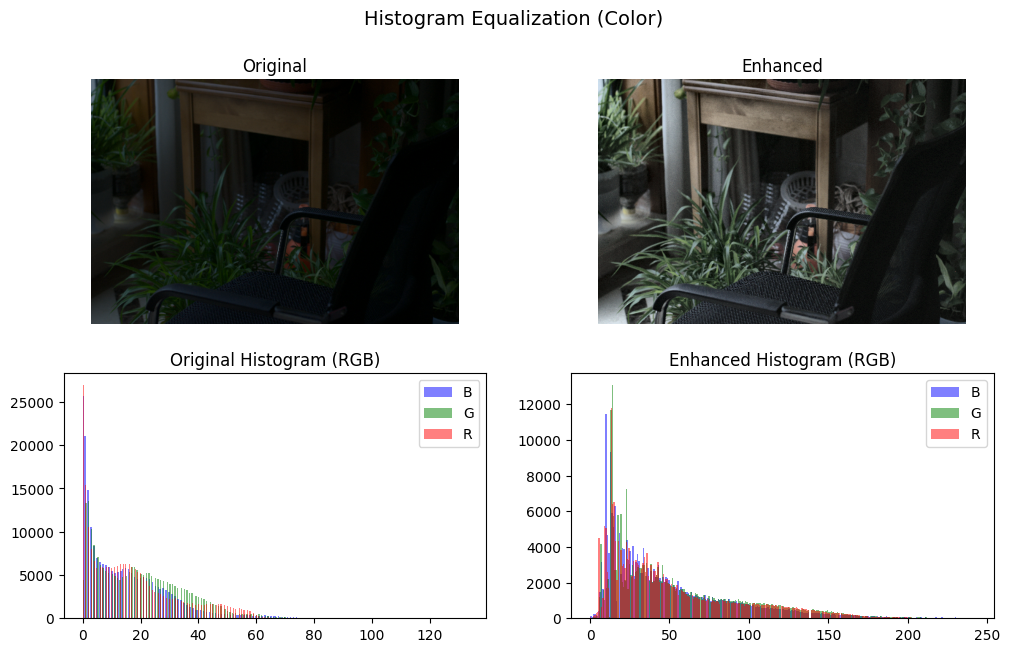

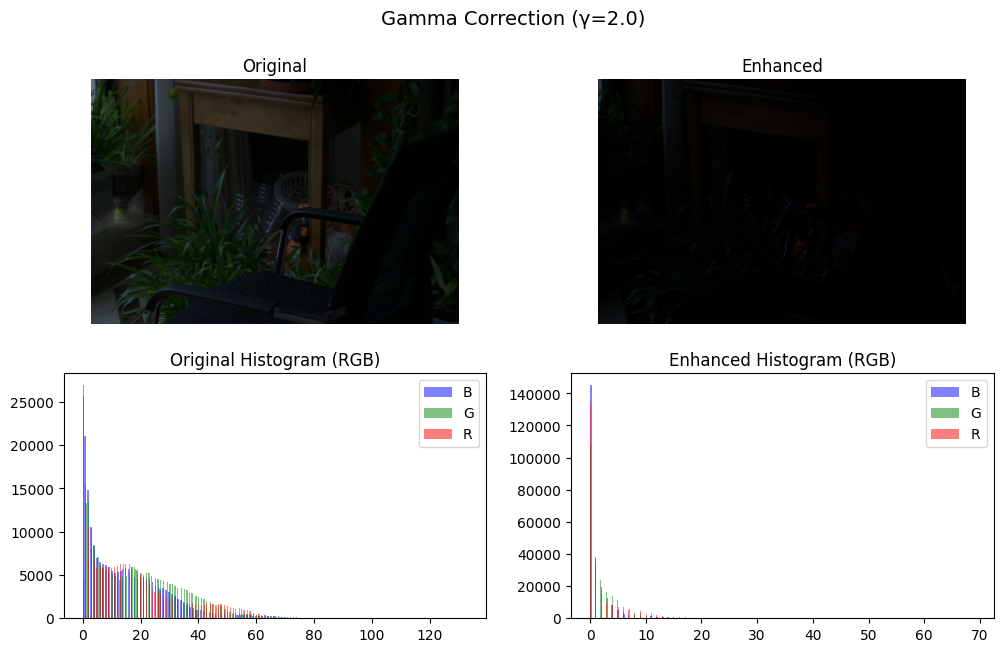

[INFO] Processing: 57.png


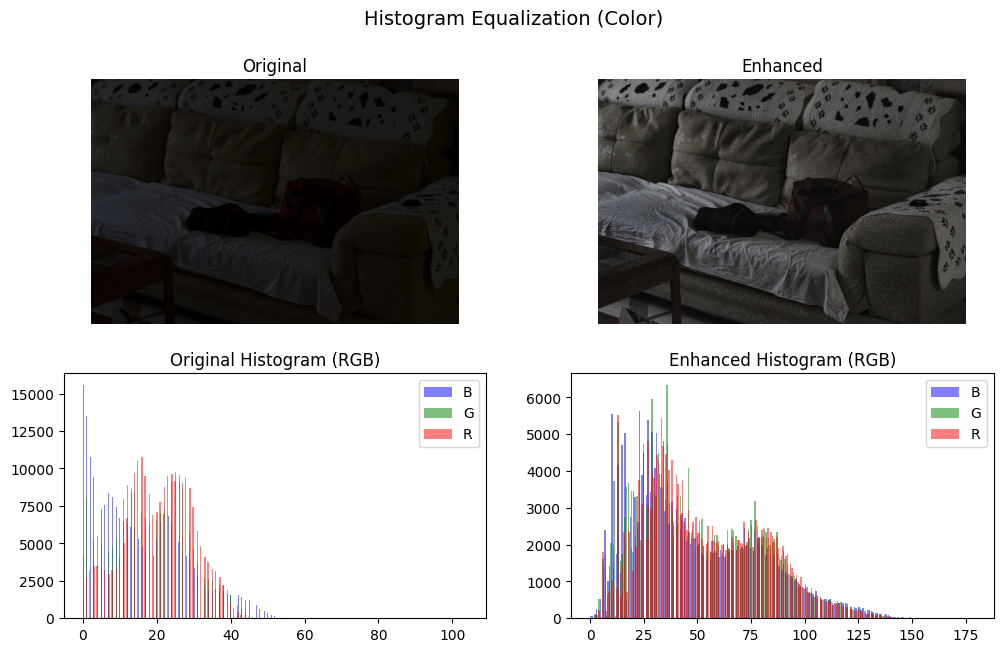

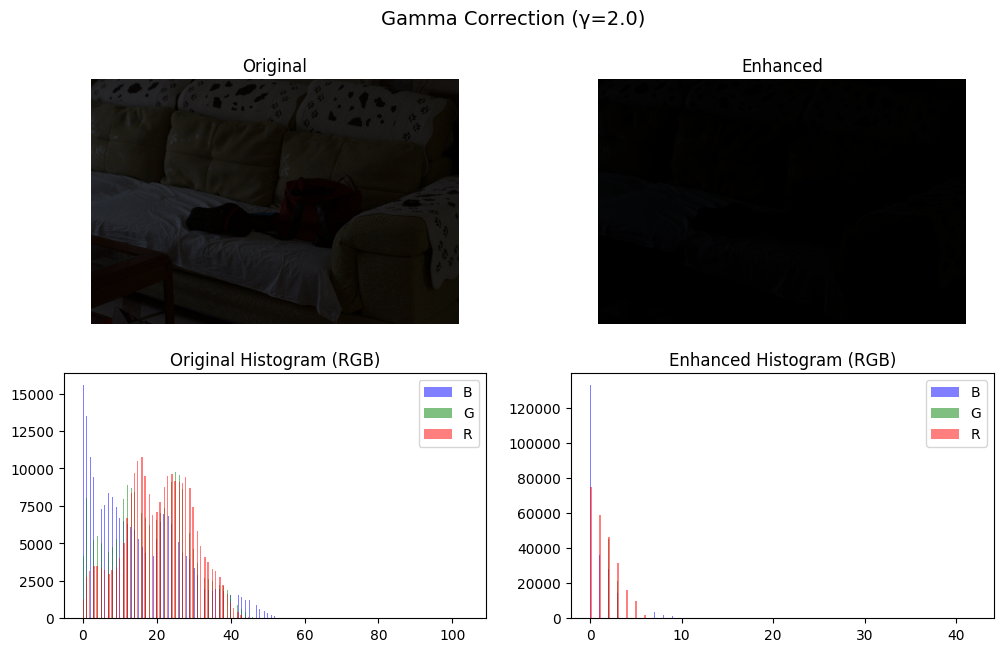

[INFO] Processing: 9.png


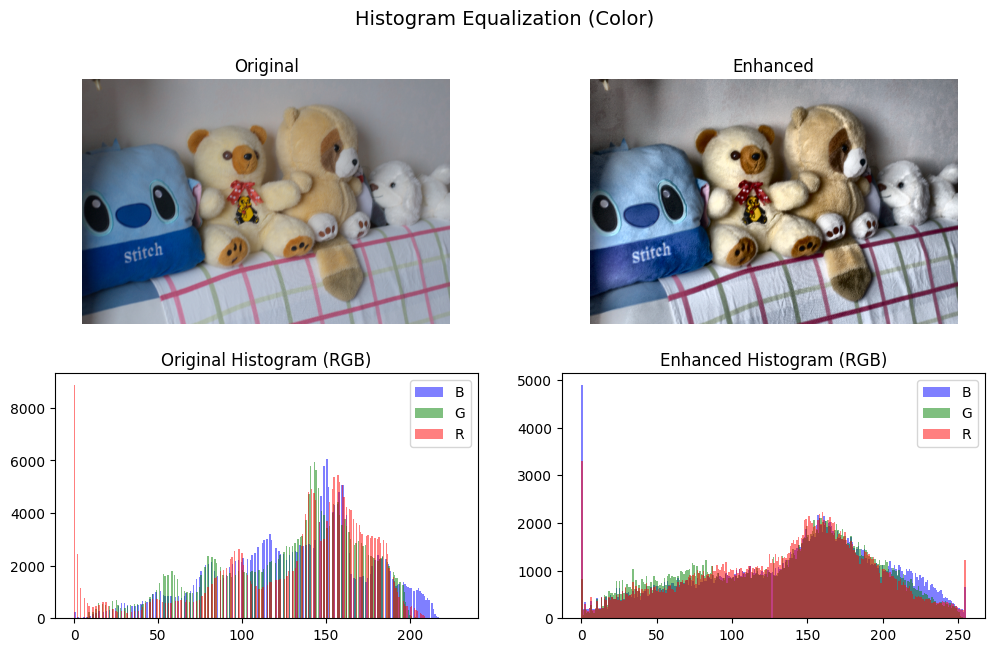

KeyboardInterrupt: 

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Creating results folder
save_path = "results"
os.makedirs(save_path, exist_ok=True)

# Function: showing image + histogram
def show_and_save(title, original, processed, filename, suffix):
    # Save processed image
    out_path = os.path.join(save_path, f"{filename}_{suffix}.jpg")
    cv2.imwrite(out_path, processed)
    
    # Plot side-by-side
    fig, axs = plt.subplots(2, 2, figsize=(12, 7))
    fig.suptitle(title, fontsize=14)
    
    # Original
    axs[0,0].imshow(cv2.cvtColor(original, cv2.COLOR_BGR2RGB))
    axs[0,0].set_title("Original")
    axs[0,0].axis("off")
    
    # Processed
    axs[0,1].imshow(cv2.cvtColor(processed, cv2.COLOR_BGR2RGB))
    axs[0,1].set_title("Enhanced")
    axs[0,1].axis("off")
    
    # Histogram (Original - per channel)
    colors = ('b','g','r')
    for i, col in enumerate(colors):
        axs[1,0].hist(original[:,:,i].ravel(), bins=256, color=col, alpha=0.5, label=f"{col.upper()}")
    axs[1,0].set_title("Original Histogram (RGB)")
    axs[1,0].legend()
    
    # Histogram (Processed - per channel)
    for i, col in enumerate(colors):
        axs[1,1].hist(processed[:,:,i].ravel(), bins=256, color=col, alpha=0.5, label=f"{col.upper()}")
    axs[1,1].set_title("Enhanced Histogram (RGB)")
    axs[1,1].legend()
    
    plt.show()

#   Histogram Equalization (CLAHE Color)
def histogram_equalization(img, filename):
    # Convert to LAB color space
    lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
    l, a, b = cv2.split(lab)

    # Apply CLAHE on L-channel only (improved contrast)
    clahe = cv2.createCLAHE(clipLimit=4.0, tileGridSize=(8, 8))
    cl = clahe.apply(l)

    # Merge channels and convert back to BGR
    limg = cv2.merge((cl, a, b))
    equ_bgr = cv2.cvtColor(limg, cv2.COLOR_LAB2BGR)

    # Show and save
    show_and_save("Histogram Equalization (Color)", img, equ_bgr, filename, "histeq_color")

#   Gamma Correction
def gamma_correction(img, gamma, filename):
    if gamma <= 0:
        gamma = 1.0
    
    table = np.array([((i / 255.0) ** gamma) * 255
                      for i in np.arange(256)]).astype("uint8")
    
    gamma_img = cv2.LUT(img, table)

    show_and_save(f"Gamma Correction (γ={gamma})", img, gamma_img, filename, f"gamma{gamma}")
    return gamma_img

#   Main processing
image_folder = r"D:\DataSet"   # <-- dataset path
valid_ext = [".jpg", ".jpeg", ".png"]

for file in os.listdir(image_folder):
    if any(file.lower().endswith(ext) for ext in valid_ext):
        img_path = os.path.join(image_folder, file)
        img = cv2.imread(img_path)
        if img is None:
            print(f"[WARNING] Skipping: {file}")
            continue
        filename = os.path.splitext(file)[0]
        print(f"[INFO] Processing: {file}")
        
        # Applying techniques
        histogram_equalization(img, filename)
        gamma_correction(img, gamma=0.5, filename=filename)

print(f"[INFO] Done! Enhanced images saved in: {save_path}")
